In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

df = pd.read_csv('Covid_Data/owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])

df1 = df[df["date"] == "2020-11-01"]

mortality_rate = []
for i in range(len(df1.total_cases)):
    mortality_rate.append(df1.total_deaths.values[i]/df1.total_cases.values[i])

First_of_November_data = df1.filter(items = ['iso_code','continent','location','total_cases_per_million','total_deaths_per_million','gdp_per_capita','hospital_beds_per_thousand','population_density'])
First_of_November_data.insert(5,'mortality_rate',mortality_rate,True)
First_of_November_data.insert(9,'log_population_density',np.log(First_of_November_data['population_density']),True)


df2 = df[df["date"] >= "2020-01-01"]

mortality_rate = []
for i in range(len(df2.total_cases)):
    mortality_rate.append(df2.total_deaths.values[i]/df2.total_cases.values[i])
    
All_Months_data = df2.filter(items = ['iso_code','continent','location','date','new_cases','new_deaths','total_cases_per_million','total_deaths_per_million','gdp_per_capita','hospital_beds_per_thousand','population_density'])
All_Months_data.insert(8,'mortality_rate',mortality_rate,True)
#print(All_Months_data)
#print(First_of_November_data)

In [52]:
sb.set_style("darkgrid")
hue_value = 'continent'
pandemic_indexes = ['total_cases_per_million','total_deaths_per_million','mortality_rate']
country_characteristics = ['gdp_per_capita','hospital_beds_per_thousand','population_density']

def generate_Scatter_Plots_of_Data(A_data):    
    fig, ax = plt.subplots(3,3,figsize=(25.5,25.5))
       
    for i in range(len(pandemic_indexes)):
        for j in range(len(country_characteristics)):
            sb.scatterplot(x=pandemic_indexes[i],y=country_characteristics[j],hue=hue_value,data=A_data,ax=ax[i][j])

def log_Scatter_Plots(A_data):
    print('Log of population density over each index')
    fig2, ax2 = plt.subplots(1,3,figsize=(20,7))
 
    sb.scatterplot(x='total_cases_per_million',y='log_population_density',hue=hue_value,data = A_data,ax = ax2[0])
    sb.scatterplot(x='total_deaths_per_million',y='log_population_density',hue=hue_value,data = A_data,ax = ax2[1])
    sb.scatterplot(x='mortality_rate',y='log_population_density',hue=hue_value,data = A_data,ax = ax2[2])
    
def compute_Pearson_Correlation_Coeffient(A_data):
    print('-----------------------------------------------------------------------------------------------------')
    print('Pearson Correlation Coefficient of each pair (pandemic index,country characteristic) with its p-value')
    print('-----------------------------------------------------------------------------------------------------')

    CleanedData = A_data.dropna()
    for i in range(len(pandemic_indexes)):        
        for j in range(len(country_characteristics)):
            print('\n{} & {}'.format(pandemic_indexes[i],country_characteristics[j]))
            print(stats.pearsonr(CleanedData[pandemic_indexes[i]], CleanedData[country_characteristics[j]]))
            if j == 2:
                print('\n{} & log({})'.format(pandemic_indexes[i],country_characteristics[j]))
                print(stats.pearsonr(CleanedData[pandemic_indexes[i]], CleanedData['log_'+country_characteristics[j]]))
        print('\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

Compute pandemic statistics for all continents at 1/11/2020



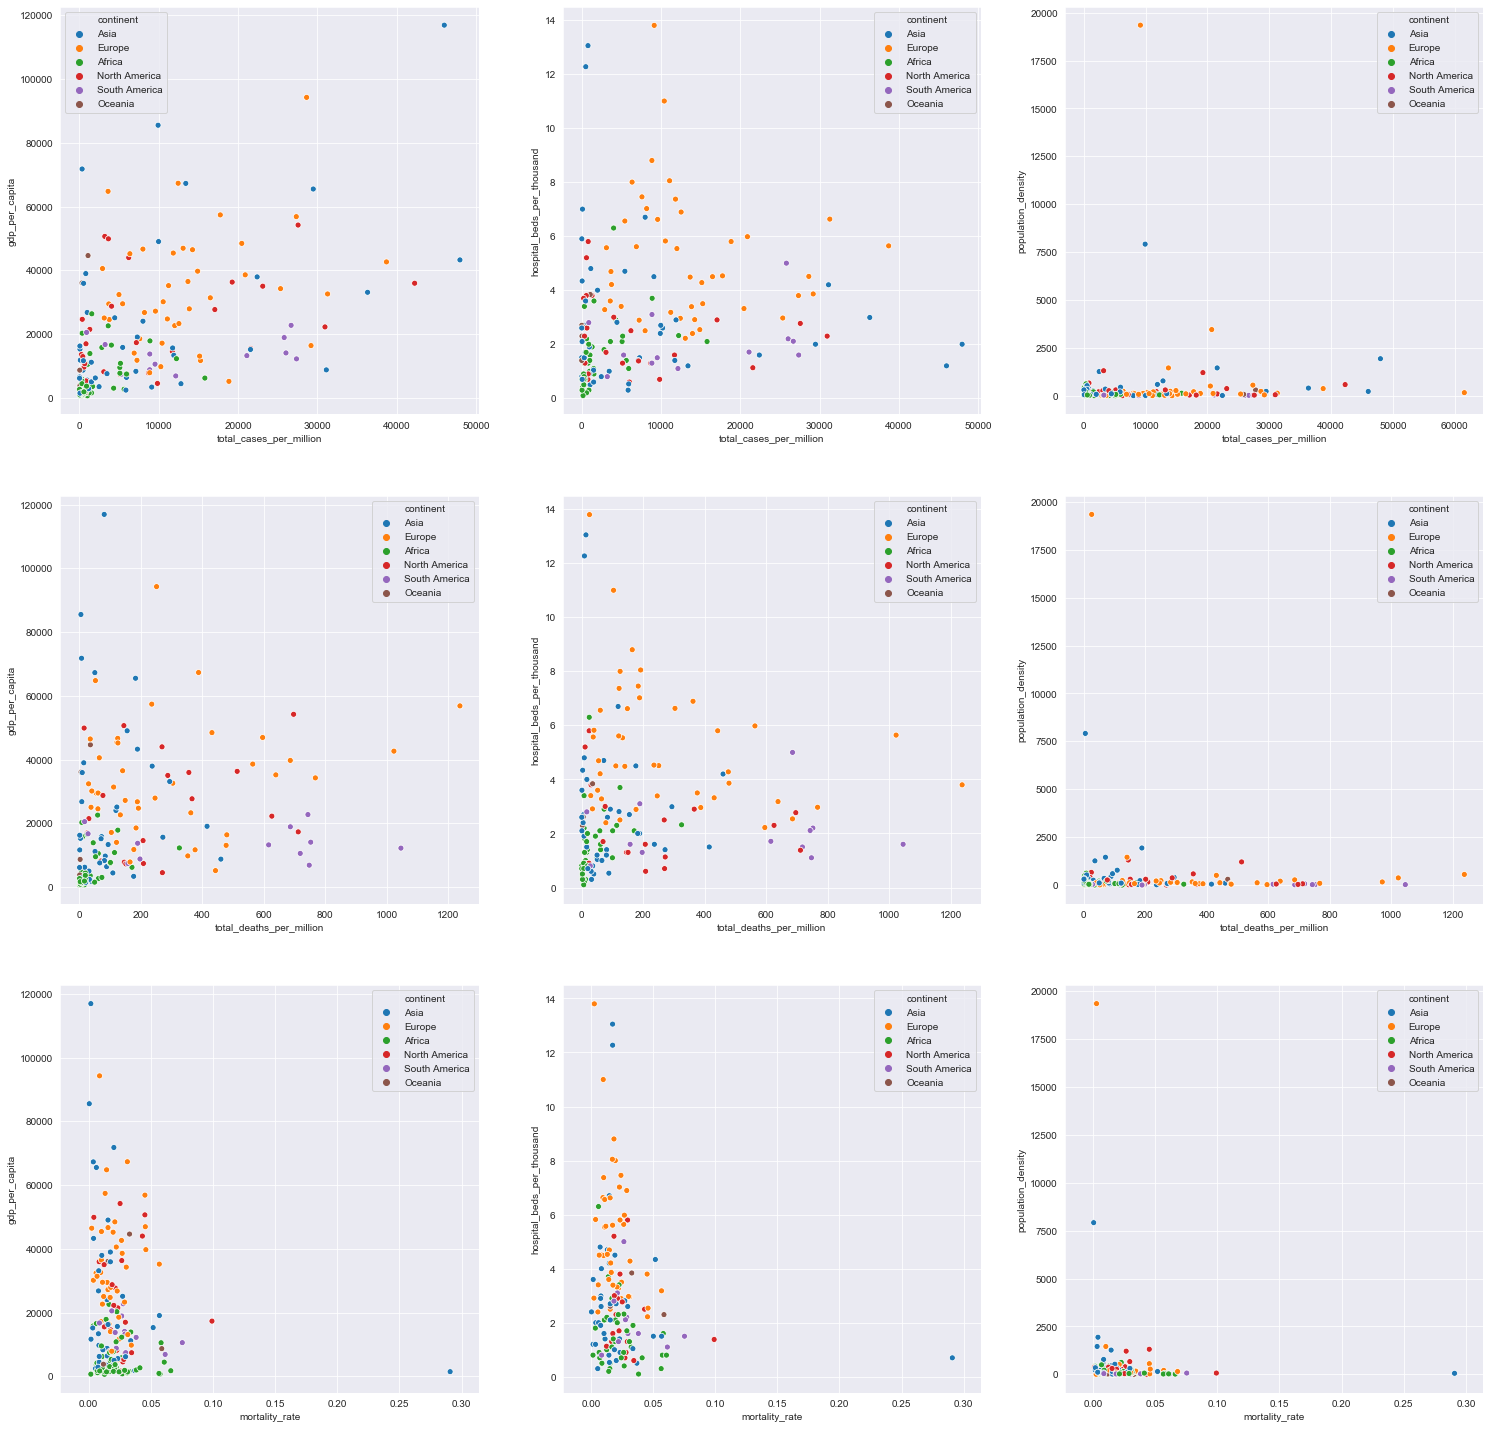

In [53]:
print('Compute pandemic statistics for all continents at 1/11/2020\n')
generate_Scatter_Plots_of_Data(First_of_November_data)

Compute pandemic statistics for all continents at 1/11/2020

Log of population density over each index


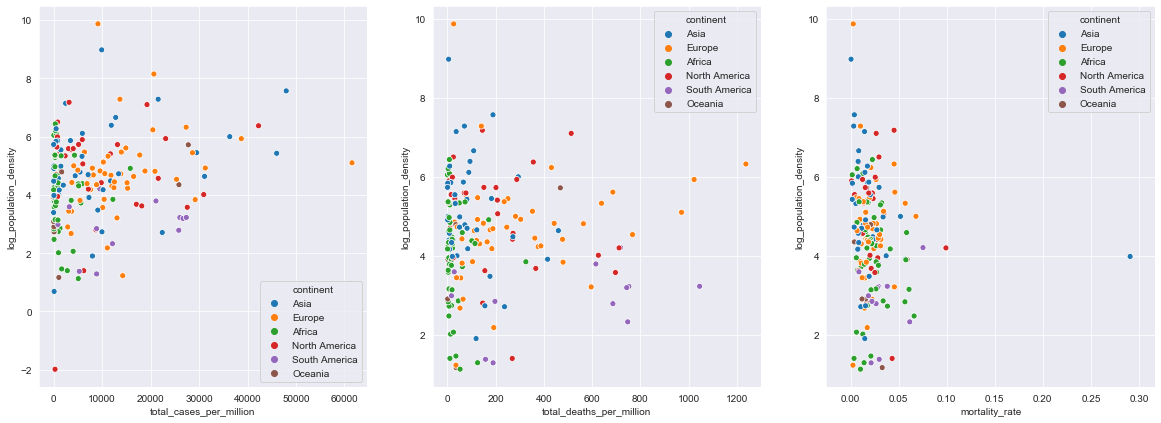

In [54]:
print('Compute pandemic statistics for all continents at 1/11/2020\n')
log_Scatter_Plots(First_of_November_data)

In [55]:
print('Compute pandemic statistics for all continents at 1/11/2020\n')
compute_Pearson_Correlation_Coeffient(First_of_November_data)

Compute pandemic statistics for all continents at 1/11/2020

-----------------------------------------------------------------------------------------------------
Pearson Correlation Coefficient of each pair (pandemic index,country characteristic) with its p-value
-----------------------------------------------------------------------------------------------------

total_cases_per_million & gdp_per_capita
(0.4979553653555061, 1.3875827660428626e-10)

total_cases_per_million & hospital_beds_per_thousand
(0.15198459021669591, 0.06611031525856406)

total_cases_per_million & population_density
(0.0840278885646634, 0.3115965750310855)

total_cases_per_million & log(population_density)
(0.12449331533416085, 0.13300243893021285)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

total_deaths_per_million & gdp_per_capita
(0.21580039946514354, 0.008662075358112468)

total_deaths_per_million & hospital_beds_per_thousand
(0.07995603655429184, 0.33570713803553864)

total_deaths_per_million & populat

Compute pandemic statistics for all continents without Africa at 1/11/2020



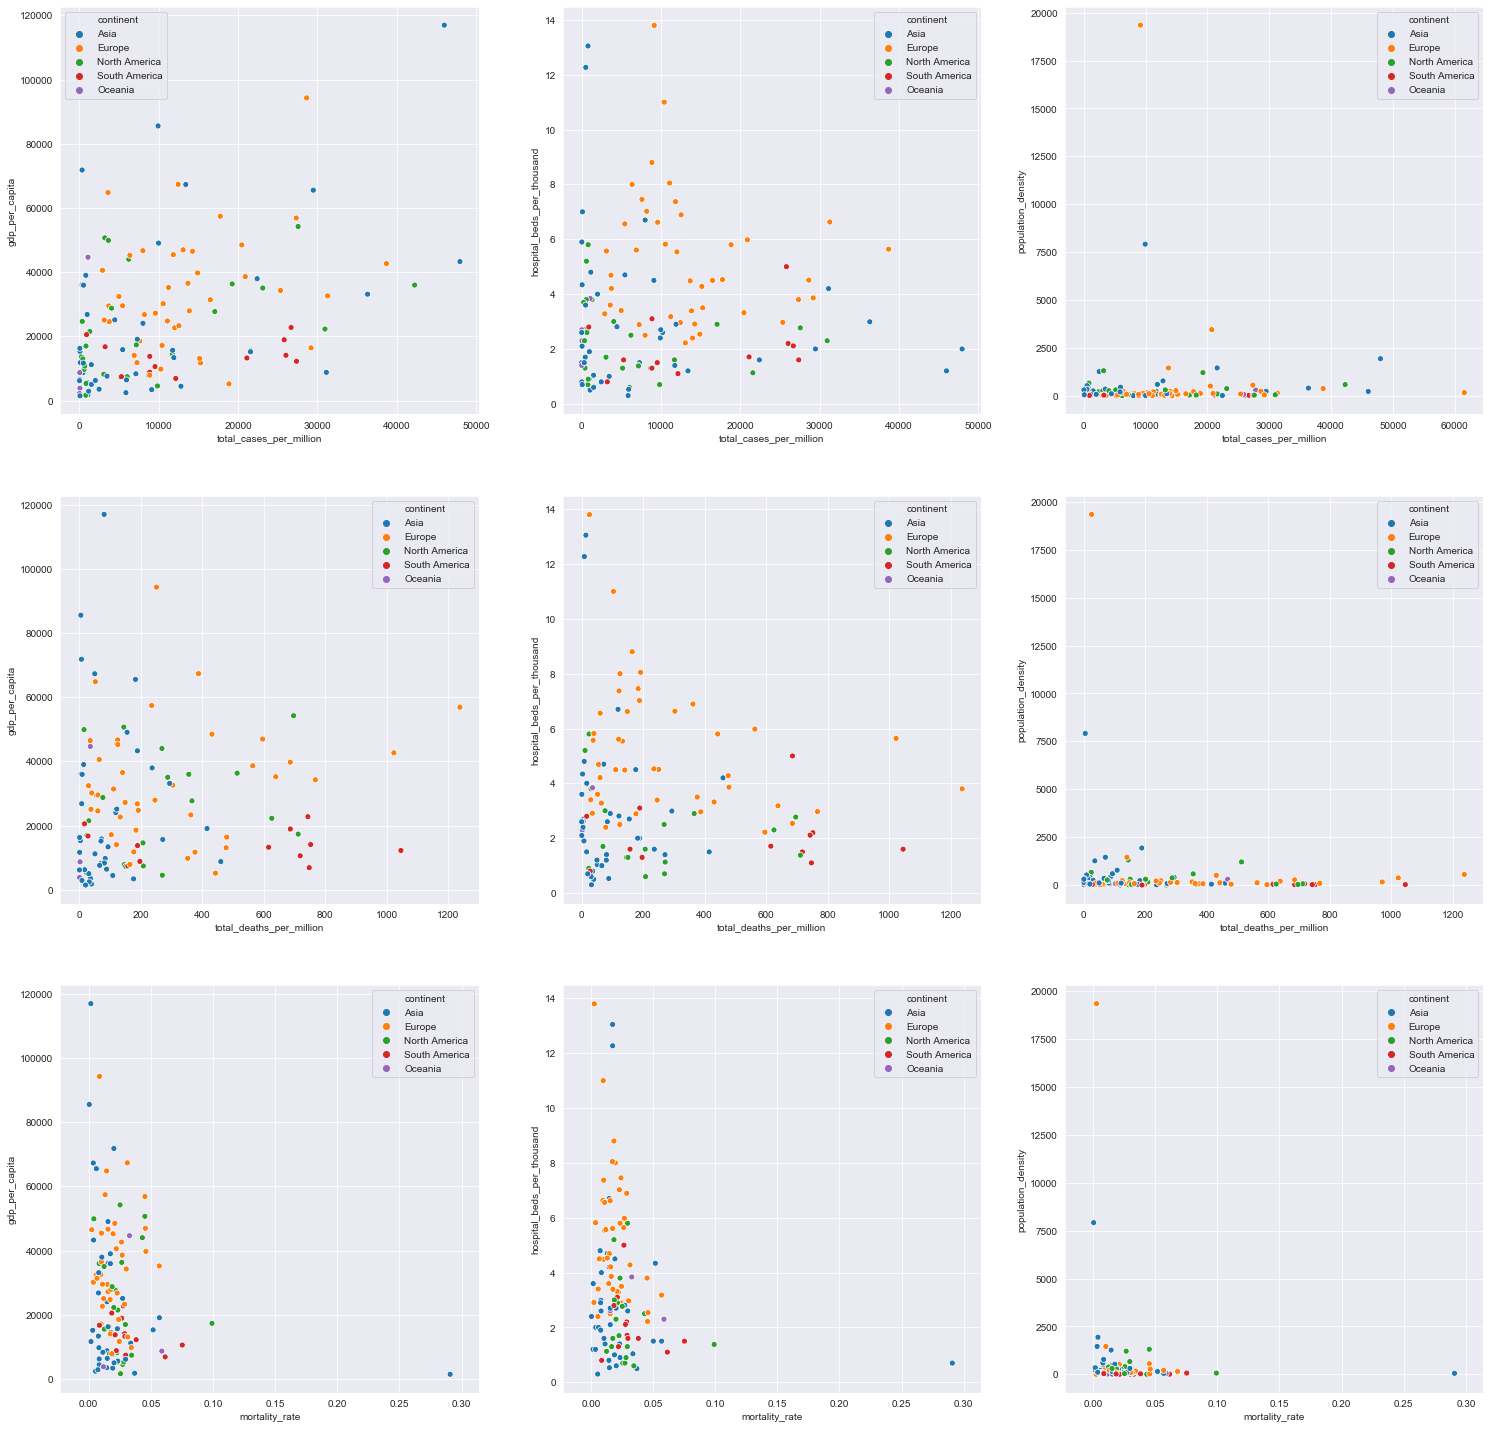

In [56]:
Without_Africa_data = First_of_November_data[First_of_November_data['continent']!="Africa"]
print('Compute pandemic statistics for all continents without Africa at 1/11/2020\n')
generate_Scatter_Plots_of_Data(Without_Africa_data)

Compute pandemic statistics for all continents without Africa at 1/11/2020

Log of population density over each index


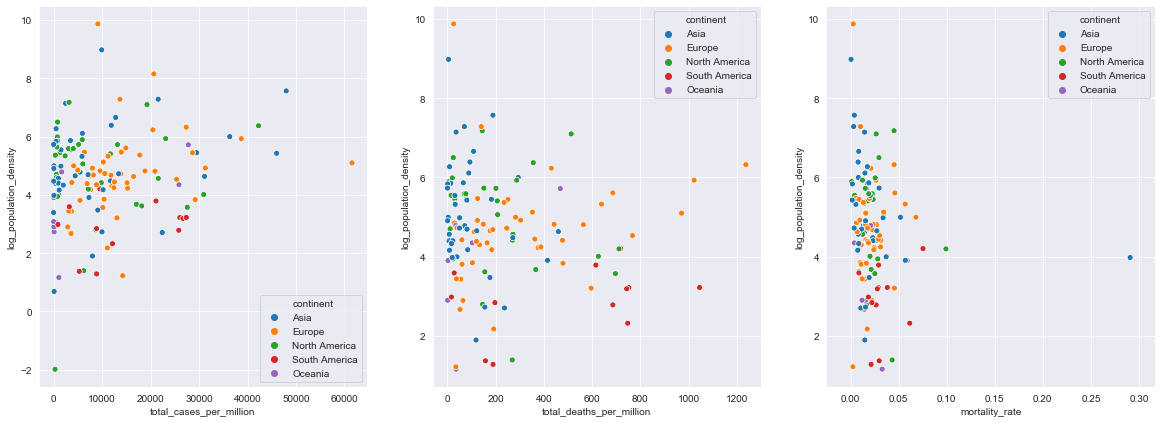

In [57]:
print('Compute pandemic statistics for all continents without Africa at 1/11/2020\n')
log_Scatter_Plots(Without_Africa_data)

In [58]:
print('Compute pandemic statistics for all continents without Africa at 1/11/2020\n')
compute_Pearson_Correlation_Coeffient(Without_Africa_data)

Compute pandemic statistics for all continents without Africa at 1/11/2020

-----------------------------------------------------------------------------------------------------
Pearson Correlation Coefficient of each pair (pandemic index,country characteristic) with its p-value
-----------------------------------------------------------------------------------------------------

total_cases_per_million & gdp_per_capita
(0.39802442808437133, 1.6612666040601912e-05)

total_cases_per_million & hospital_beds_per_thousand
(-0.009339892330726567, 0.9228529002042223)

total_cases_per_million & population_density
(0.059014805082109795, 0.5402625517571974)

total_cases_per_million & log(population_density)
(0.10613742176916617, 0.2697741299034626)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

total_deaths_per_million & gdp_per_capita
(0.07340355057309317, 0.4460019330242842)

total_deaths_per_million & hospital_beds_per_thousand
(-0.06621594630532579, 0.4918935838175944)

total_deaths_per_m

Compute pandemic statistics for Europe at 1/11/2020



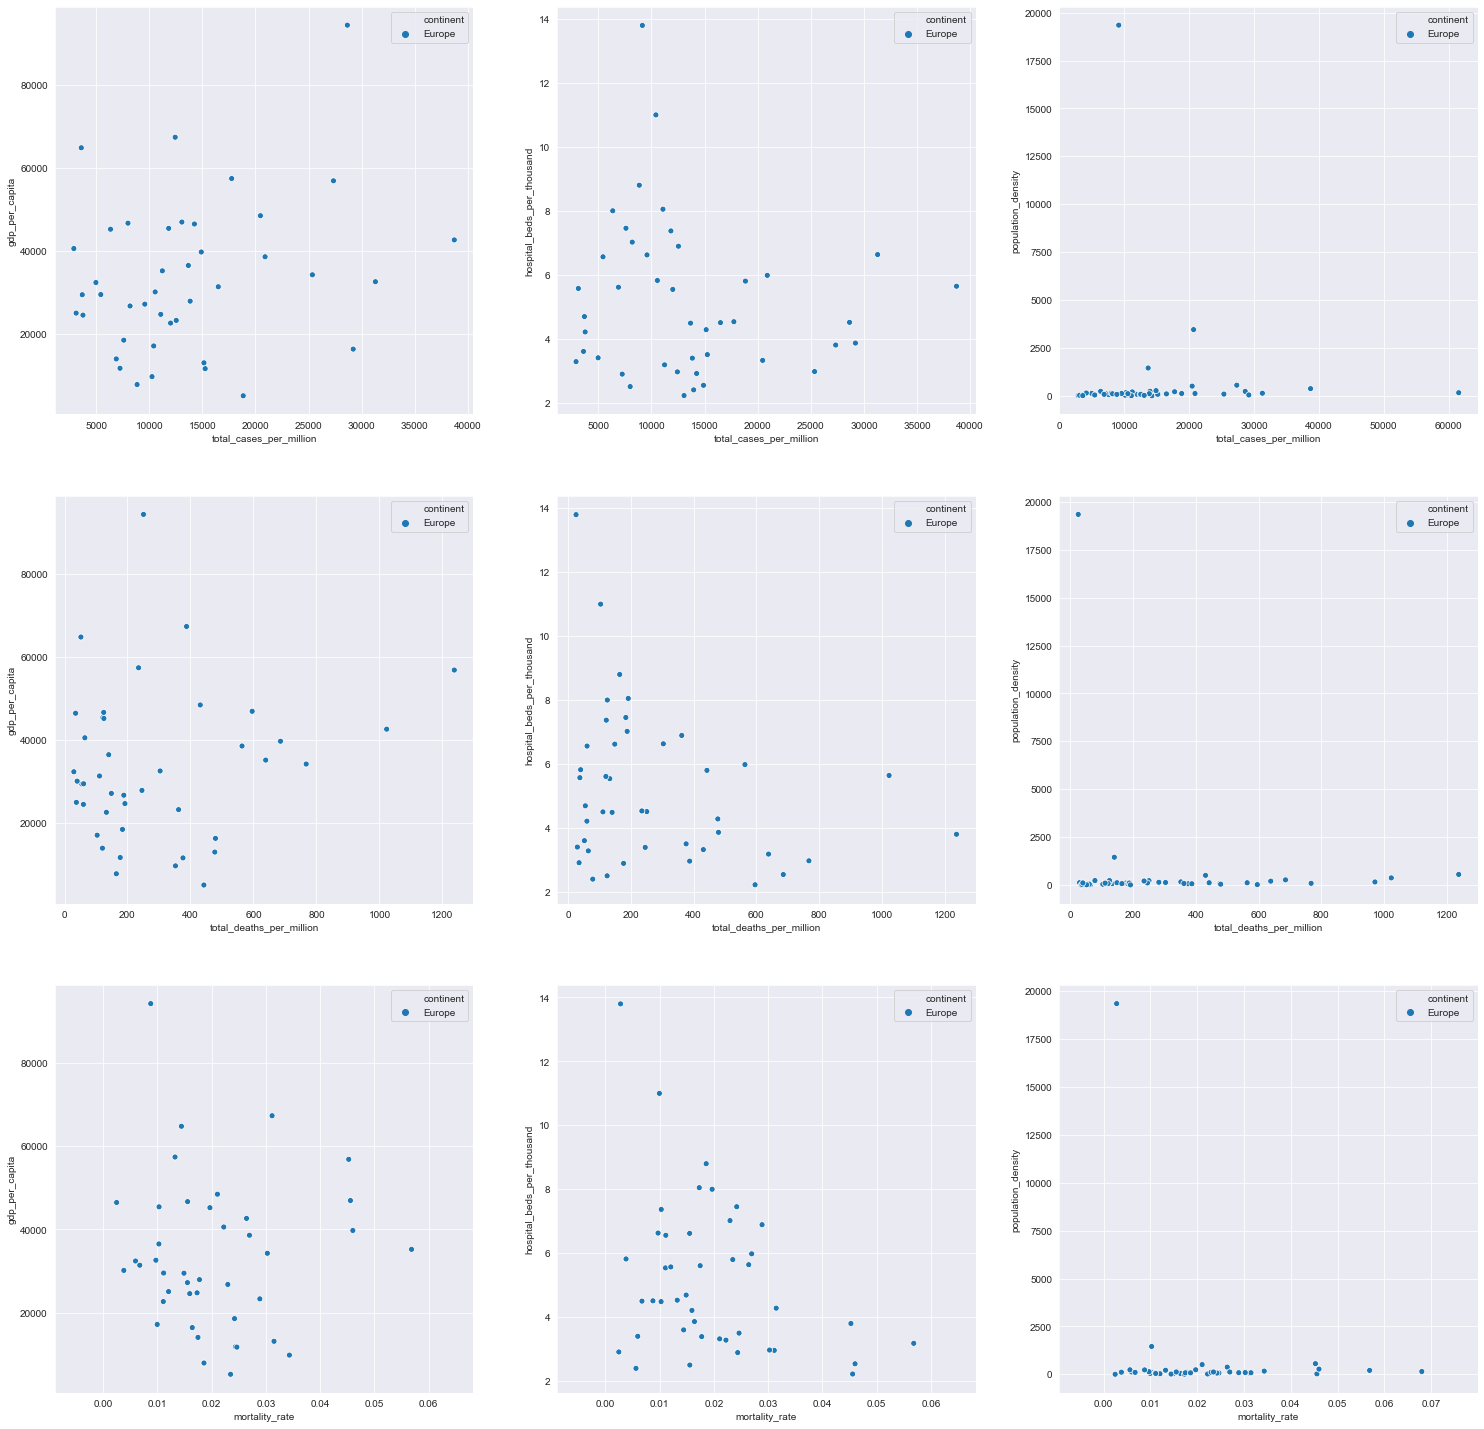

In [59]:
Only_Europe_data = First_of_November_data[First_of_November_data['continent']=="Europe"]
print('Compute pandemic statistics for Europe at 1/11/2020\n')
generate_Scatter_Plots_of_Data(Only_Europe_data)

Compute pandemic statistics for Europe at 1/11/2020

Log of population density over each index


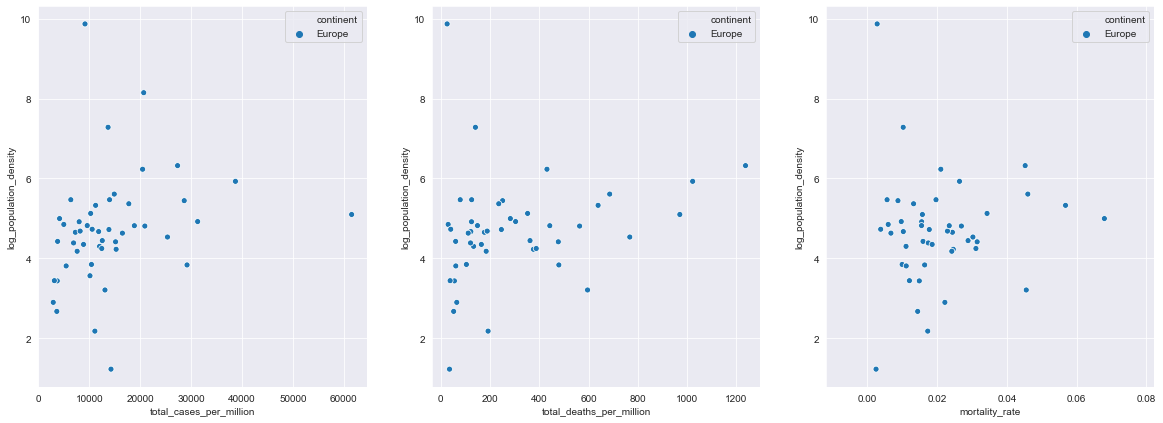

In [60]:
print('Compute pandemic statistics for Europe at 1/11/2020\n')
log_Scatter_Plots(Only_Europe_data)

In [61]:
print('Compute pandemic statistics for Europe at 1/11/2020\n')
compute_Pearson_Correlation_Coeffient(Only_Europe_data)

Compute pandemic statistics for Europe at 1/11/2020

-----------------------------------------------------------------------------------------------------
Pearson Correlation Coefficient of each pair (pandemic index,country characteristic) with its p-value
-----------------------------------------------------------------------------------------------------

total_cases_per_million & gdp_per_capita
(0.25042061258453757, 0.11429816798953907)

total_cases_per_million & hospital_beds_per_thousand
(-0.10505332176792703, 0.513318325641967)

total_cases_per_million & population_density
(0.2645599980778979, 0.09461217211445695)

total_cases_per_million & log(population_density)
(0.39609467719094094, 0.010358739526891024)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

total_deaths_per_million & gdp_per_capita
(0.1615865547141537, 0.3128240432800646)

total_deaths_per_million & hospital_beds_per_thousand
(-0.2692555156956372, 0.08868815998476576)

total_deaths_per_million & population_density


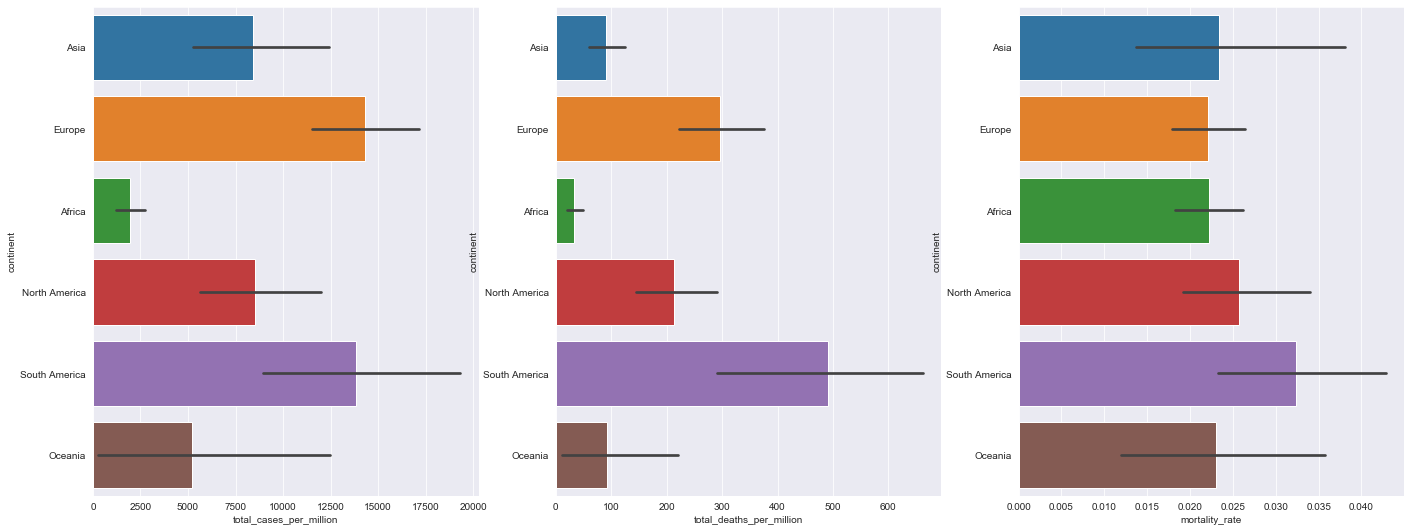

In [62]:
fig3, ax3 = plt.subplots(1,3,figsize=(23.5,9)) 
sb.barplot(x='total_cases_per_million',y='continent',data=First_of_November_data,ax=ax3[0]) 
sb.barplot(x='total_deaths_per_million',y='continent',data=First_of_November_data,ax=ax3[1]) 
sb.barplot(x='mortality_rate',y='continent',data=First_of_November_data,ax=ax3[2])

In [63]:
Continents = First_of_November_data.groupby('continent')

Continent_names = ['Asia','Europe','Africa','North America','South America','Oceania']

def compute_ttest(index):
    print('--------------------------------------------------------------')
    print('{} index for each pair of continents'.format(index))
    print('--------------------------------------------------------------')
    Continents_data = []
    for name in Continent_names:
        Continents_data.append(Continents.get_group(name).dropna())
    
    for i in range(len(Continent_names)):
        for j in range(i+1,len(Continent_names)):
            print('\n{} & {}'.format(Continent_names[i],Continent_names[j]))
            print(stats.ttest_ind(Continents_data[i][index],Continents_data[j][index],equal_var=False))
    print('\n')
    
compute_ttest('total_cases_per_million')
compute_ttest('total_deaths_per_million')
compute_ttest('mortality_rate')


--------------------------------------------------------------
total_cases_per_million index for each pair of continents
--------------------------------------------------------------

Asia & Europe
Ttest_indResult(statistic=-1.6519207743808755, pvalue=0.10365414075934455)

Asia & Africa
Ttest_indResult(statistic=3.2403540159898134, pvalue=0.0023545925328380454)

Asia & North America
Ttest_indResult(statistic=-0.028845215278184552, pvalue=0.9771259667318715)

Asia & South America
Ttest_indResult(statistic=-1.4407459638254958, pvalue=0.16275805140282973)

Asia & Oceania
Ttest_indResult(statistic=4.230804168568113, pvalue=0.00014549739536796205)

Europe & Africa
Ttest_indResult(statistic=7.736227468873616, pvalue=2.4097779953505393e-10)

Europe & North America
Ttest_indResult(statistic=1.5274382691252282, pvalue=0.1381098445935419)

Europe & South America
Ttest_indResult(statistic=-0.3305157257517716, pvalue=0.7453323246713397)

Europe & Oceania
Ttest_indResult(statistic=9.64763196994048

In [64]:
def analyze_per_month(inData):
    Months = inData.groupby(inData['date'].dt.month)
    
    dfplot = pd.DataFrame()
    frames = []
    total_new_cases_per_month = []

    for month, month_data in Months:
        days_of_month = month_data.groupby(month_data['date'].dt.day)
        sums_of_new_cases = []
        sums_of_new_deaths = []
        month_mortality_rate = []

        for day, day_data in days_of_month:
            sum_new_cases = sum(day_data['new_cases'].dropna())
            sum_new_deaths = sum(day_data['new_deaths'].dropna())
            sums_of_new_cases.append(sum_new_cases)          
            sums_of_new_deaths.append(sum_new_deaths)
            
            if sum_new_cases == 0:
                month_mortality_rate.append(0)
            else:
                month_mortality_rate.append(sum_new_deaths/sum_new_cases)
        total_new_cases_per_month.append(sum(sums_of_new_cases))

        dfmonth = pd.DataFrame()
        dfmonth.insert(0,'month',[month]*len(days_of_month),True)
        dfmonth.insert(1,'sums_of_new_cases',sums_of_new_cases,True)
        dfmonth.insert(2,'sums_of_new_deaths',sums_of_new_deaths,True)
        dfmonth.insert(3,'month_mortality_rate',month_mortality_rate,True)
        frames.append(dfmonth)

    dfplot = pd.concat(frames,ignore_index=True)
    return [dfplot,total_new_cases_per_month]

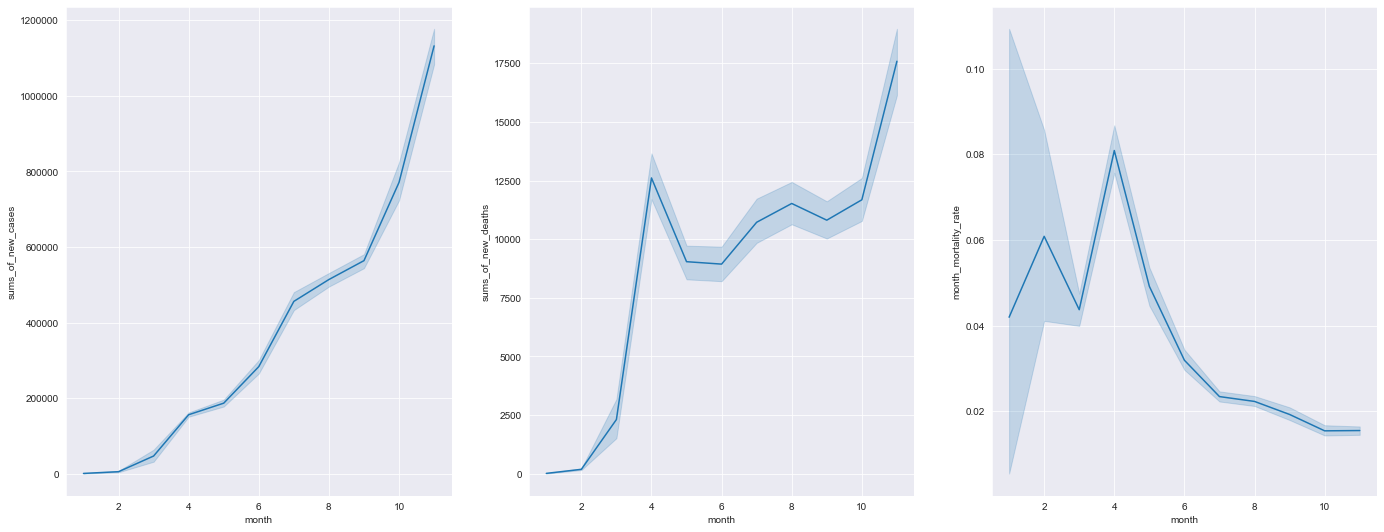

In [65]:
output = analyze_per_month(All_Months_data)
fig4, ax4 = plt.subplots(1,3,figsize=(23.5,9)) 
sb.lineplot(x='month', y = 'sums_of_new_cases' ,data = output[0], ax = ax4[0])
sb.lineplot(x='month', y = 'sums_of_new_deaths', data = output[0], ax = ax4[1])
sb.lineplot(x='month', y = 'month_mortality_rate', data = output[0], ax = ax4[2])

Text(0, 0.5, 'new cases')

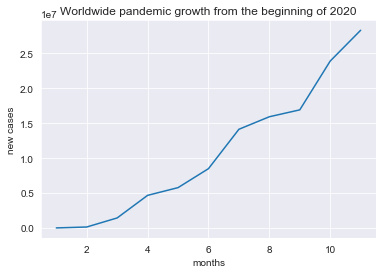

In [66]:
month_index = [1,2,3,4,5,6,7,8,9,10,11]

plt.plot(month_index,output[1])
plt.title('Worldwide pandemic growth from the beginning of 2020')
plt.xlabel('months')
plt.ylabel('new cases')

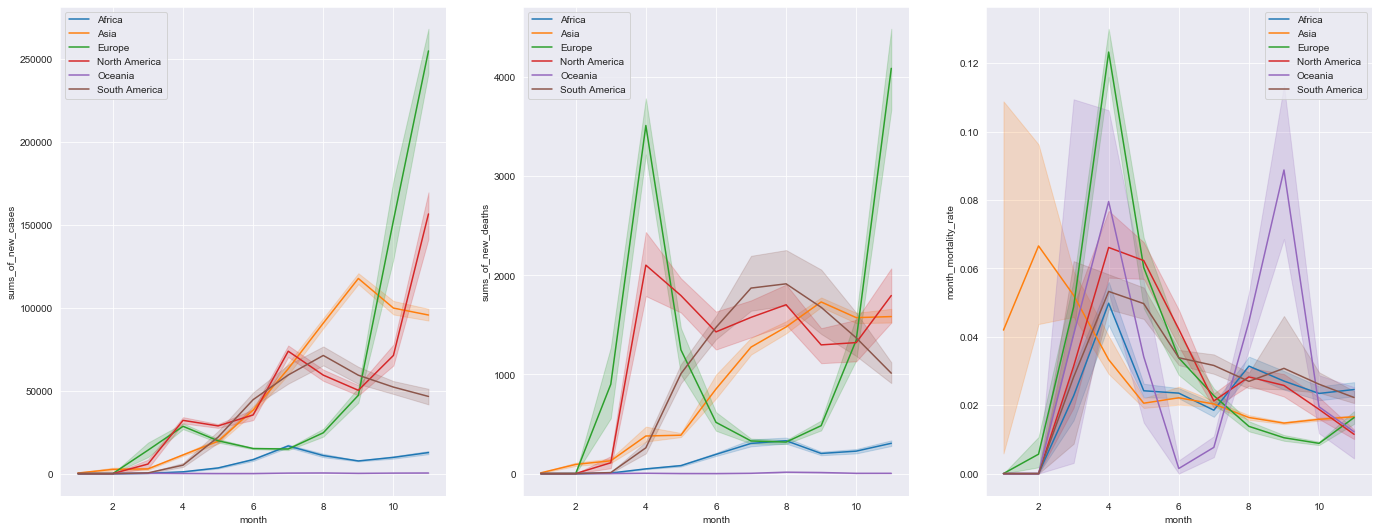

In [67]:
Continents2 = df2.groupby(df2['continent'])
fig5, ax5 = plt.subplots(1,3,figsize=(23.5,9)) 

for continent,continent_data in Continents2:
    output = analyze_per_month(continent_data)   
    sb.lineplot(x='month', y = 'sums_of_new_cases' ,data = output[0], ax = ax5[0],legend='brief',label=continent)
    sb.lineplot(x='month', y = 'sums_of_new_deaths', data = output[0], ax = ax5[1],legend='brief',label=continent)
    sb.lineplot(x='month', y = 'month_mortality_rate', data = output[0], ax = ax5[2],legend='brief',label=continent)

In [68]:
df_1 = pd.read_csv('Covid_USA/united_states_covid19_cases_and_deaths_by_state.csv')
df_1 = df_1.filter(items=['State/Territory','Total Cases','Case Rate per 100000','Total Deaths','Death Rate per 100000'])

df_2 = pd.read_excel('Covid_USA/state-voting.xlsx')

Vote = []
Abbr = []

New_York_City_line = df_1[df_1['State/Territory'] == 'New York City'].index
New_York_line = df_1[df_1['State/Territory'] == 'New York'].index
df_1.loc[New_York_line[0]] = df_1.loc[New_York_City_line[0]]+df_1.loc[New_York_line[0]]
df_1.at[New_York_line[0],'State/Territory'] ='New York'

i=0
for state in list(df_1['State/Territory']):
    if state not in list(df_2['State']):
        df_1.drop(df_1[df_1['State/Territory'] == state].index,inplace=True)
    else:
        Vote.append(df_2['Vote'][i])
        Abbr.append(df_2['Abbreviation'][i])
        i+=1

Num_vote = []
for vote in Vote:
    if vote == 'D':
        Num_vote.append(1)
    else:
        Num_vote.append(0)
        
df_1.insert(1,'Abbreviation',Abbr,True)    
df_1.insert(2,'Vote',Vote,True)
df_1.insert(3,'Num Vote',Num_vote,True)
#df_1

Text(0, 0.5, 'States count')

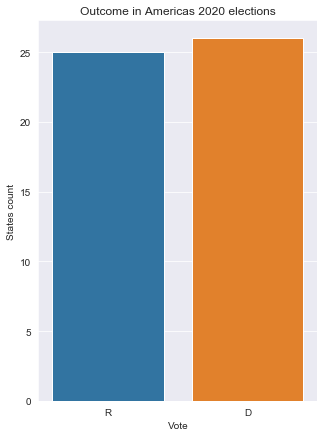

In [69]:
plt.figure(figsize=(5,7))
plt.title('Οutcome in Americas 2020 elections')
sb.countplot(x='Vote',data=df_2)
plt.ylabel('States count')

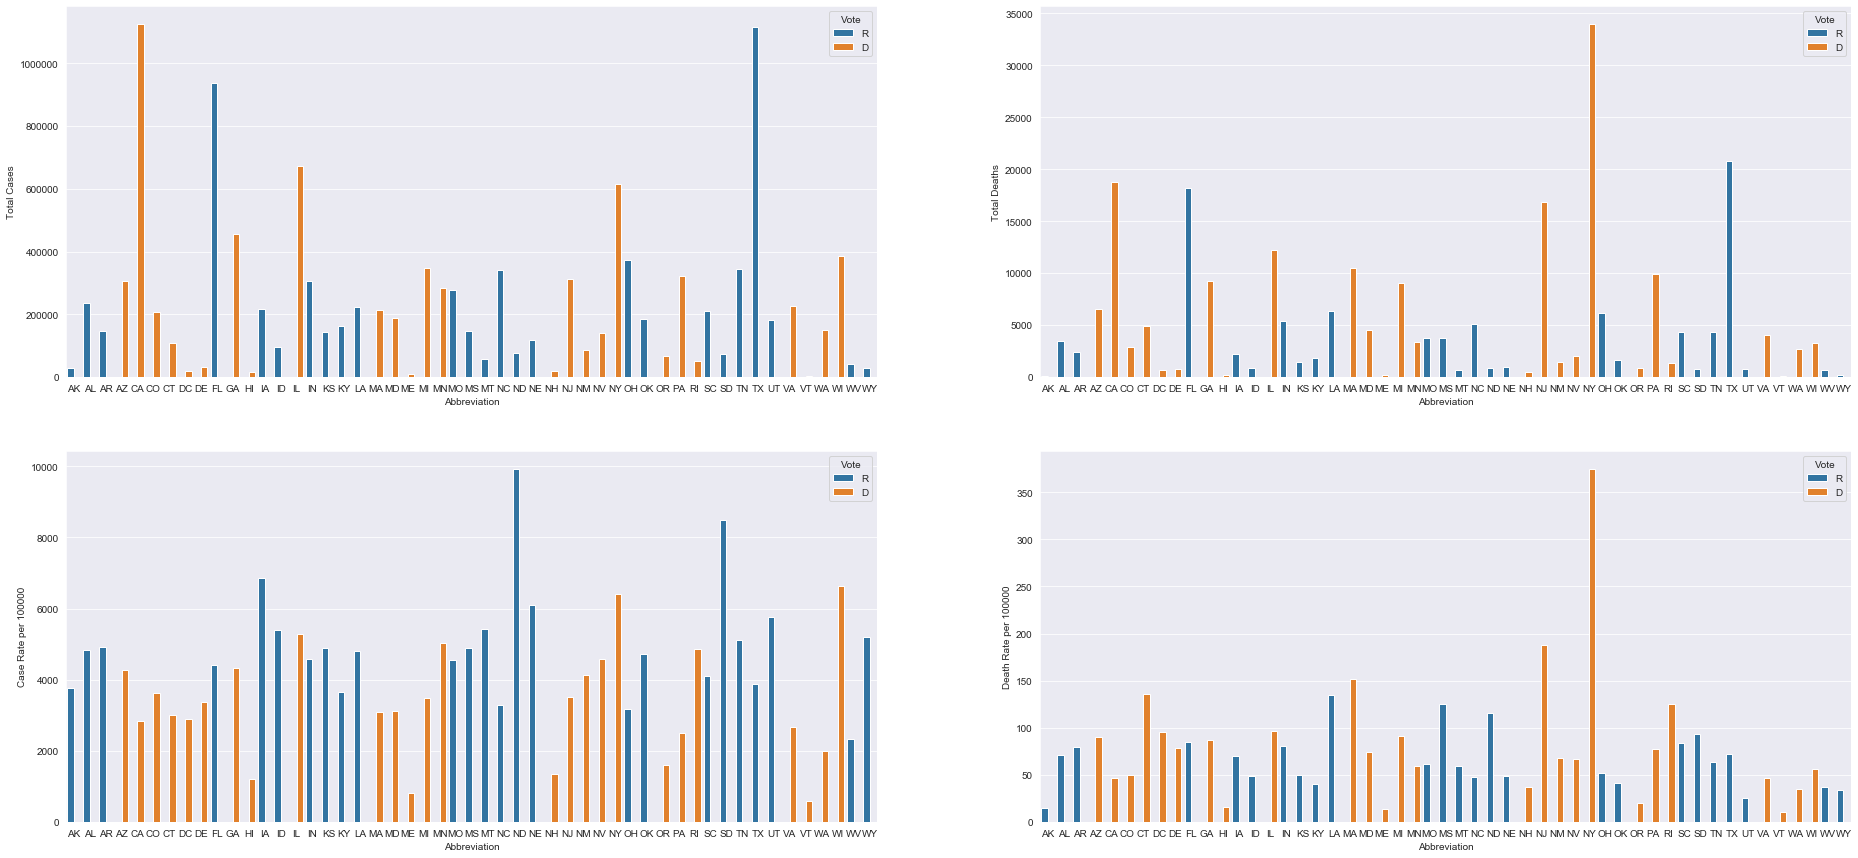

<Figure size 1440x720 with 0 Axes>

In [70]:
fig5, ax5 = plt.subplots(2,2,figsize=(32,15))
plt.figure(figsize=(20,10))
sb.barplot(x='Abbreviation',y='Total Cases',hue='Vote',data=df_1,ax=ax5[0][0])
sb.barplot(x='Abbreviation',y='Total Deaths',hue='Vote',data=df_1,ax=ax5[0][1])
sb.barplot(x='Abbreviation',y='Case Rate per 100000',hue='Vote',data=df_1,ax=ax5[1][0])
sb.barplot(x='Abbreviation',y='Death Rate per 100000',hue='Vote',data=df_1,ax=ax5[1][1])